In [11]:
# Viktors Belovs
# Master Biology student
# matr. nr. 11585937
# LMU Munich 2017
# Project 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import path
import seaborn as sns
import math
from scipy import stats
%matplotlib inline

Load into the Pandas dataframe

In [13]:
pd.read_csv('Salaries.csv')

Unnamed: 0       rank discipline  yrs.since.phd  yrs.service     sex  \
0             1       Prof          B             19           18    Male   
1             2       Prof          B             20           16    Male   
2             3   AsstProf          B              4            3    Male   
3             4       Prof          B             45           39    Male   
4             5       Prof          B             40           41    Male   
5             6  AssocProf          B              6            6    Male   
6             7       Prof          B             30           23    Male   
7             8       Prof          B             45           45    Male   
8             9       Prof          B             21           20    Male   
9            10       Prof          B             18           18  Female   
10           11  AssocProf          B             12            8    Male   
11           12   AsstProf          B              7            2    Male   
12           13   AsstProf          B              1            1    Male   
13           14   AsstProf          B              2            0    Male   
14           15       Prof          B             20           18    Male   
15           16       Prof          B             12            3    Male   
16           17       Prof          B             19           20    Male   
17           18       Prof          A             38           34    Male   
18           19       Prof          A             37           23    Male   
19           20       Prof          A             39           36  Female   
20           21       Prof          A             31           26    Male   
21           22       Prof          A             36           31    Male   
22           23       Prof          A             34           30    Male   
23           24       Prof          A             24           19    Male   
24           25  AssocProf          A             13            8  Female   
25           26       Prof          A             21            8    Male   
26           27       Prof          A             35           23    Male   
27           28   AsstProf          B              5            3    Male   
28           29   AsstProf          B             11            0    Male   
29           30       Prof          B             12            8    Male   
..          ...        ...        ...            ...          ...     ...   
367         368  AssocProf          A             10            1    Male   
368         369       Prof          A             35           30    Male   
369         370       Prof          A             33           31    Male   
370         371  AssocProf          A             13            8    Male   
371         372       Prof          A             23           20    Male   
372         373       Prof          A             12            7    Male   
373         374       Prof          A             30           26    Male   
374         375       Prof          A             27           19    Male   
375         376       Prof          A             28           26    Male   
376         377   AsstProf          A              4            1    Male   
377         378   AsstProf          A              6            3    Male   
378         379       Prof          A             38           38    Male   
379         380  AssocProf          A             11            8    Male   
380         381   AsstProf          A              8            3    Male   
381         382       Prof          A             27           23    Male   
382         383  AssocProf          A              8            5    Male   
383         384       Prof          A             44           44    Male   
384         385       Prof          A             27           21    Male   
385         386       Prof          A             15            9    Male   
386         387       Prof          A             29           27    Male   
3

Creating a Dataframe and defining as a variable

In [14]:
data = pd.read_csv('Salaries.csv')

In [16]:
df = pd.DataFrame(data)
df.head(

SyntaxError: unexpected EOF while parsing (<ipython-input-16-9bc61f13eb1d>, line 2)

In [7]:
# Variables (columns) in dataset
df.columns

Index(['Unnamed: 0', 'rank', 'discipline', 'yrs.since.phd', 'yrs.service',
       'sex', 'salary'],
      dtype='object')

Analysis 1.0: Description of the data

In [8]:
# amount of data
len(df)

397

In [9]:
# Amount of people according to their academic status
df.groupby('rank').salary.count().head()

rank
AssocProf     64
AsstProf      67
Prof         266
Name: salary, dtype: int64

In [10]:
# Amount of people according to their gender
df.groupby('sex').salary.count().head()

sex
Female     39
Male      358
Name: salary, dtype: int64

In [10]:
# Amount of people according to their discipline
df.groupby('discipline').salary.count().head()

discipline
A    181
B    216
Name: salary, dtype: int64

Analysis 2.0: distribution of the salaries and its relations.

Mean of salaries

In [11]:
np.mean(df['salary'])

113706.45843828715

In [12]:
# mean salaray according to the gender ('for' method)
groupby_sex = df.groupby('sex')
for sex, salary in groupby_sex['salary']:
    print((sex, salary.mean()))

('Female', 101002.41025641025)
('Male', 115090.41899441341)


Distribution of Salaries

In [13]:
df.salary.plot.hist(color='c')
plt.title('Salary')
plt.xlabel('dollars')

Various relations

In [14]:
emploee_df = df.groupby('Unnamed: 0').mean()
emploee_df.head()

yrs.since.phd  yrs.service  salary
Unnamed: 0                                    
1                      19           18  139750
2                      20           16  173200
3                       4            3   79750
4                      45           39  115000
5                      40           41  141500

In [15]:
# correlation between years (of service/since PhD) and average salary
emploee_df.corr()

yrs.since.phd  yrs.service    salary
yrs.since.phd       1.000000     0.909649  0.419231
yrs.service         0.909649     1.000000  0.334745
salary              0.419231     0.334745  1.000000

Graphical representation of different relations (in scatter plots)

Relation between Salary and Years of service

In [16]:
df.plot.scatter('yrs.service', 'salary', color='orange')
plt.title('Salary/Years of service')

Relation between Salary and Years since PhD 

In [17]:
df.plot.scatter('yrs.since.phd', 'salary', color='green')
plt.title('Salary/Years since PhD')

Same plots (plus regression)

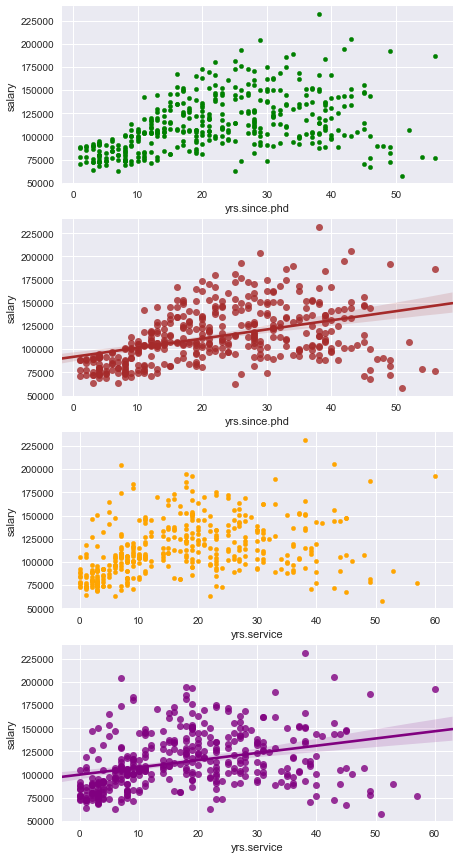

In [18]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(7, 15) )

df.plot.scatter('yrs.since.phd', 'salary', color='green', ax=ax1)
sns.regplot(x='yrs.since.phd', y='salary', data=df, color='brown', ax=ax2)
df.plot.scatter('yrs.service', 'salary', color='orange', ax=ax3)
sns.regplot(x='yrs.service', y='salary', data=df, color='purple', ax=ax4)

Introducing Box plots for a further analysis

Salary distribution among academic staff

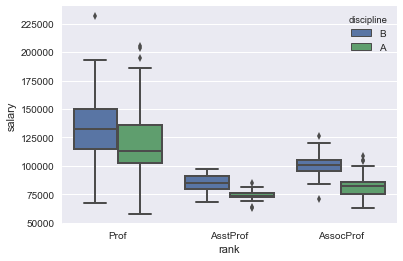

In [19]:
ax = sns.boxplot(x='rank', y='salary', hue='discipline', data = df, linewidth=2)

In [20]:
# mean of salary according to academic rank 
academ_df = df.groupby('rank').salary.mean()
academ_df

rank
AssocProf     93876.437500
AsstProf      80775.985075
Prof         126772.109023
Name: salary, dtype: float64

Box plot

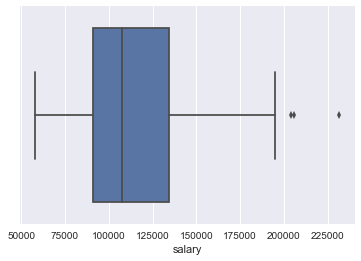

In [21]:
# Graphical representation of salary 

ax = sns.boxplot(x=df["salary"])

In [22]:
# mean of salary (numpy method)
np.mean(df['salary'])

113706.45843828715

In [23]:
# maximum value of salary
np.max(df['salary'])

231545

In [24]:
# minimum value of salary
np.min(df['salary'])

57800

In [25]:
# quartiles
lst = np.sort(df.salary)

def get_median(lst):
    lst_cnt = len(lst)
    mid_idx = int(lst_cnt / 2)
    if lst % 2 !=0:
        return lst_cnt[mid_idx]
    return (lst_cnt[mid_idx-1] + lst[mid_idx]) / 2

def get_lower_half(lst):
    mid_idx = math.floor(len(lst) / 2)
    return(lst[0:mid_idx])

def get_upper_half(lst):
    mid_idx = math.ceil(len(lst) / 2)
    return(lst[mid_idx:])

def show_results(lst):
    
    q1 = np.median(get_lower_half(lst))
    q2 = np.median(lst)
    q3 = np.median(get_upper_half(lst))
    qr = q3 - q1
    
    print("Lower Half: %s" %(get_lower_half(lst)))
    print("")
    print("Upper Half: %s" %(get_upper_half(lst)))
    print("")
    print("Q1: %s" %(q1))
    print("Q2: %s" %(q2))
    print("Q3: %s" %(q3))
    print("Interquartile Range: %s" %(float(qr)))
  
show_results(lst)

Lower Half: [ 57800  62884  63100  63900  67559  68404  69200  69700  70000  70700
  70768  71065  72300  72500  72500  72500  72500  73000  73000  73266
  73300  73500  73800  73877  74000  74000  74000  74000  74500  74692
  74830  74856  75044  75243  75996  76840  77000  77000  77081  77202
  77500  77500  77700  78000  78162  78182  78500  78785  79750  79800
  79916  80139  80225  80225  81035  81285  81500  81500  81700  81800
  82099  82100  82379  82600  83000  83001  83600  83850  83900  84000
  84240  84273  84500  84716  85000  86100  86250  86373  86895  87800
  88000  88175  88400  88600  88600  88650  88709  88795  88825  89516
  89565  89650  89942  89942  90000  90215  90304  90450  91000  91000
  91100  91227  91300  91412  92000  92000  92000  92000  92000  92050
  92391  92550  92700  92700  93000  93164  93418  93519  93904  94350
  94384  95079  95329  95408  95436  95611  95642  96200  96545  96614
  97000  97032  97150  97262  98053  98193  98510  99000  99247  

In conclusion I would like to add another element of statistics: t-Test

In [26]:
# One sample t-Test
stats.ttest_1samp(df['salary'], 0)

Ttest_1sampResult(statistic=74.798845780472519, pvalue=1.0429820824601671e-235)

In [27]:
# Two samples t-Test
female_salary = df[df['sex'] == 'Female']['salary']
male_salary = df[df['sex'] == 'Male']['salary']
stats.ttest_ind(female_salary, male_salary)

Ttest_indResult(statistic=-2.781674064262432, pvalue=0.0056671065193386813)